# 完全採用 VGG 16 預先訓練的模型

## 載入套件

In [1]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import decode_predictions
import numpy as np

## 載入模型

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

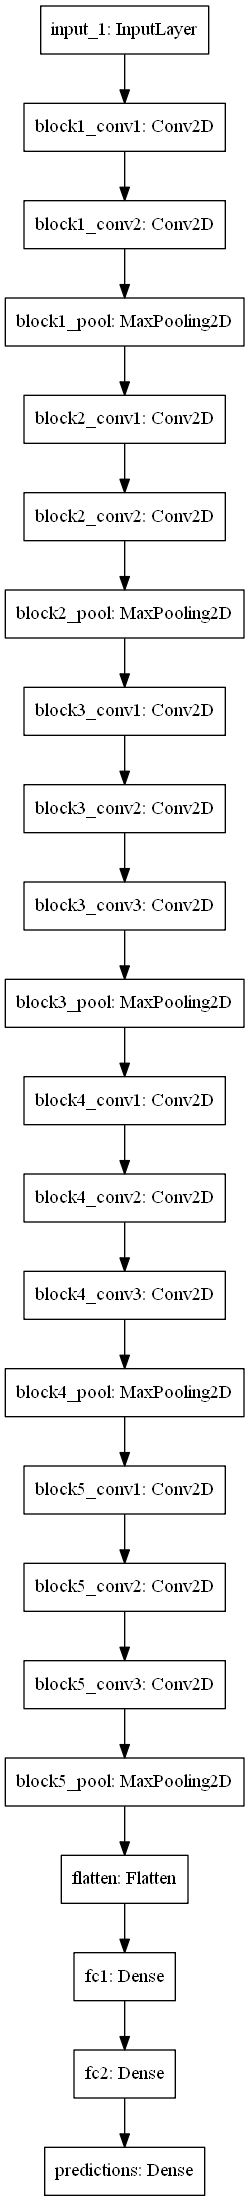

In [2]:
model = VGG16(weights='imagenet')
print(model.summary())

# 繪製模型結構
tf.keras.utils.plot_model(model, to_file='vgg16.png')

## 模型預測

In [3]:
# 任選一張圖片，例如大象側面照
img_path = './images_test/elephant.jpg'
# 載入圖檔，並縮放寬高為 (224, 224) 
img = image.load_img(img_path, target_size=(224, 224))

# 加一維，變成 (1, 224, 224)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# 預測
preds = model.predict(x)
# decode_predictions： 取得前 3 名的物件，每個物件屬性包括 (類別代碼, 名稱, 機率)
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n02504013', 'Indian_elephant', 0.71942127), ('n02504458', 'African_elephant', 0.24141161), ('n01871265', 'tusker', 0.03627622)]


In [4]:
# 任選一張圖片，例如大象正面照
img_path = './images_test/elephant2.jpg'
# 載入圖檔，並縮放寬高為 (224, 224) 
img = image.load_img(img_path, target_size=(224, 224))

# 加一維，變成 (1, 224, 224)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# 預測
preds = model.predict(x)
# decode_predictions： 取得前 3 名的物件，每個物件屬性包括 (類別代碼, 名稱, 機率)
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n01871265', 'tusker', 0.6267539), ('n02504458', 'African_elephant', 0.3303416), ('n02504013', 'Indian_elephant', 0.04290244)]


## 載入 resnet 50 模型

In [5]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications.resnet50 import decode_predictions
import numpy as np

# 預先訓練好的模型 -- ResNet50
model = ResNet50(weights='imagenet')

In [6]:
# 任意一張圖片，例如老虎大頭照
img_path = './images_test/tiger3.jpg'
# 載入圖檔，並縮放寬高為 (224, 224) 
img = image.load_img(img_path, target_size=(224, 224))

# 加一維，變成 (1, 224, 224)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# 預測
preds = model.predict(x)
# decode_predictions： 取得前 3 名的物件，每個物件屬性包括 (類別代碼, 名稱, 機率)
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n02129604', 'tiger', 0.8657895), ('n02123159', 'tiger_cat', 0.13371062), ('n02128925', 'jaguar', 0.00046872292)]


# 側面照

In [7]:
img_path = './images_test/tiger2.jpg'
# 載入圖檔，並縮放寬高為 (224, 224) 
img = image.load_img(img_path, target_size=(224, 224))
# 加一維，變成 (1, 224, 224, 3)，最後一維是色彩
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# 預測
preds = model.predict(x)
# decode_predictions： 取得前 3 名的物件，每個物件屬性包括 (類別代碼, 名稱, 機率)
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n02129604', 'tiger', 0.9667634), ('n02123159', 'tiger_cat', 0.027020546), ('n02391049', 'zebra', 0.006071427)]
